In [9]:

# # I.E. Irodov - Problems in General Physics
# ## Mechanics: Kinematics
# 
# ### Problem 1.1
# 
# **Problem Statement:** A motorboat going downstream overcame a raft at a point A; τ = 60 min later it turned back and 
# after some time passed the raft at a distance l = 6.0 km from point A. Find the flow velocity assuming the engine to 
# develop a constant power.
# 
# ### Mathematical Explanation
# 
# When the motorboat's engine develops constant power, the boat's velocity relative to water (u) is constant.
# 
# Let's denote:
# - v: flow velocity (river current)
# - u: boat velocity relative to water
# - v₁ = u + v: boat velocity downstream (relative to shore)
# - v₂ = u - v: boat velocity upstream (relative to shore)
# 
# The raft moves with the flow velocity v.
# 
# #### Timeline of events:
# 1. At t = 0, the boat passes the raft at point A
# 2. At t = τ, the boat turns back
# 3. At some time t = τ + t₂, the boat passes the raft again at distance l from point A
# 
# #### Calculations:
# 
# During time τ, the boat travels downstream:
# s₁ = v₁τ = (u + v)τ
# 
# During this same time, the raft travels:
# s_raft₁ = vτ
# 
# So the distance between them when the boat turns around is:
# d = s₁ - s_raft₁ = (u + v)τ - vτ = uτ
# 
# Now, the boat travels upstream at velocity v₂ = u - v, while the raft continues downstream at velocity v.
# The relative velocity between them is u - v + v = u.
# 
# The time it takes for the boat to catch up with the raft is:
# t₂ = d/u = uτ/u = τ
# 
# But we also know that during time τ + t₂, the raft traveled a distance l from point A:
# l = v(τ + t₂) = v(τ + τ) = 2vτ
# 
# Therefore:
# v = l/(2τ) = 6.0 km / (2 × 60 min) = 6.0 km / 120 min = 0.05 km/min = 0.83 m/s
# 
# ### Visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.patches as patches

In [11]:
# Parameters from the problem
tau = 60  # minutes
l = 6.0   # km
v = l / (2 * tau)  # flow velocity in km/min

# Let's choose a reasonable value for u (boat speed relative to water)
# For visualization purposes, we'll make it 3 times the flow velocity
u = 3 * v

# Velocities
v1 = u + v  # downstream velocity
v2 = u - v  # upstream velocity

# Time for the boat to return to the raft after turning
t2 = tau

# Total simulation time
total_time = tau + t2 + 10  # adding some buffer time

In [12]:
# Time points for simulation
t = np.linspace(0, total_time, 1000)

# Position functions
def boat_position(t):
    positions = []
    for time in t:
        if time <= tau:
            # Boat moving downstream
            pos = v1 * time
        else:
            # Boat moving upstream
            pos = v1 * tau - v2 * (time - tau)
        positions.append(pos)
    return np.array(positions)

def raft_position(t):
    return v * t

# Calculate positions
boat_pos = boat_position(t)
raft_pos = raft_position(t)

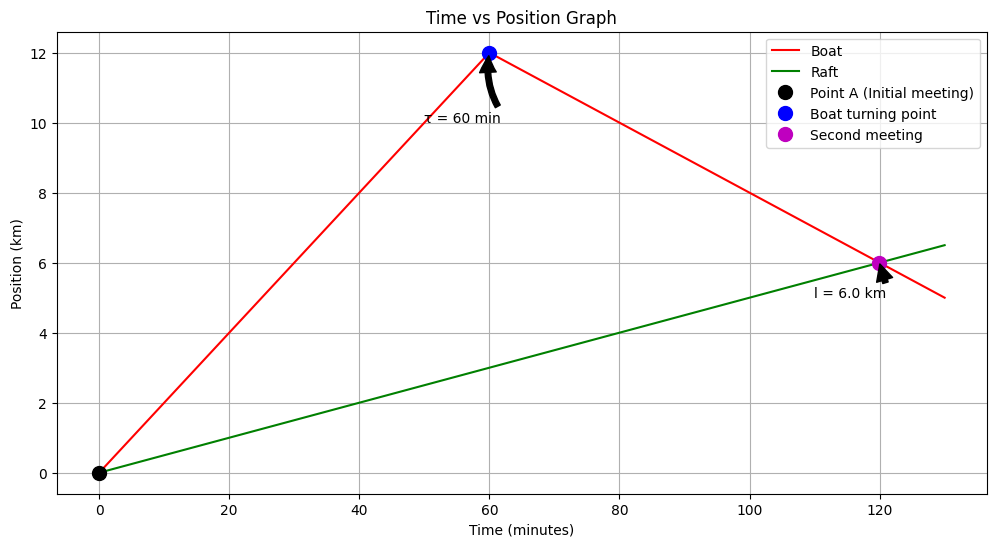

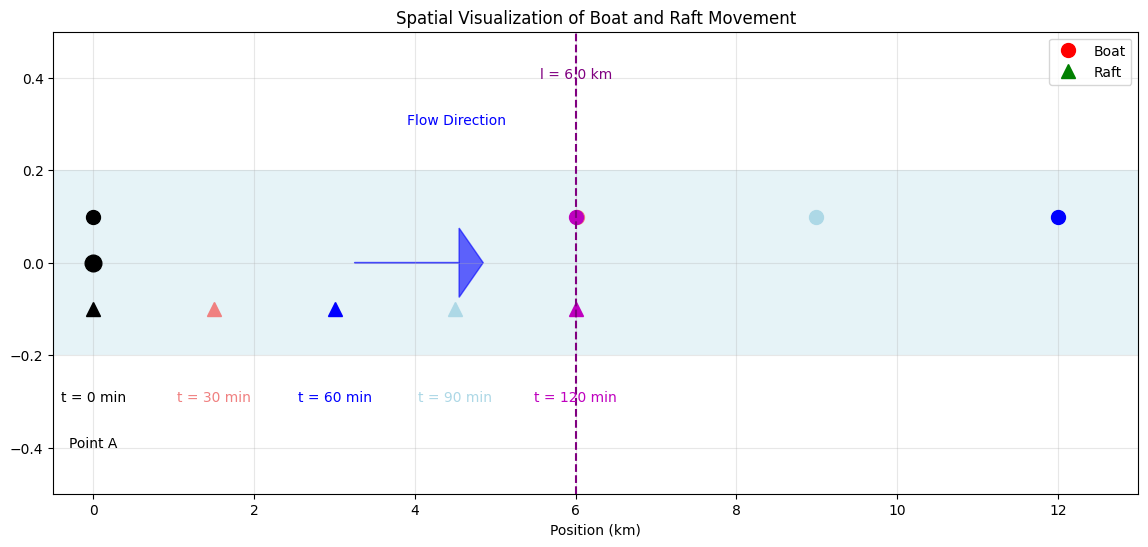

In [13]:
# First create the traditional time vs position plot
plt.figure(figsize=(12, 6))

# Plot the positions over time
plt.plot(t, boat_pos, 'r-', label='Boat')
plt.plot(t, raft_pos, 'g-', label='Raft')

# Find the index closest to tau
tau_idx = np.abs(t - tau).argmin()

# Mark important points
plt.plot(0, 0, 'ko', markersize=10, label='Point A (Initial meeting)')
plt.plot(t[tau_idx], boat_pos[tau_idx], 'bo', markersize=10, label='Boat turning point')

# Find where boat and raft meet after turning
meeting_indices = np.where(np.abs(boat_pos - raft_pos) < 0.01)[0]
meeting_idx = None
for idx in meeting_indices:
    if t[idx] > tau:  # After turning
        meeting_idx = idx
        break

if meeting_idx is not None:
    plt.plot(t[meeting_idx], boat_pos[meeting_idx], 'mo', markersize=10, label='Second meeting')
    
    # Add annotations
    plt.annotate(f'τ = {tau} min', (t[tau_idx], boat_pos[tau_idx]), 
                xytext=(t[tau_idx]-10, boat_pos[tau_idx]-2), 
                arrowprops=dict(facecolor='black', shrink=0.05, connectionstyle='arc3,rad=-0.2'))
    
    plt.annotate(f'l = {l} km', (t[meeting_idx], raft_pos[meeting_idx]), 
                xytext=(t[meeting_idx]-10, raft_pos[meeting_idx]-1), 
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Position (km)')
plt.title('Time vs Position Graph')
plt.legend()
plt.show()

# Now create a spatial visualization with the river along the position axis
plt.figure(figsize=(14, 6))

# Select a few time points to visualize
time_points = [0, tau/2, tau, tau + tau/2, tau*2] if meeting_idx is not None else [0, tau/2, tau, tau + tau/2]
colors = ['k', 'lightcoral', 'b', 'lightblue', 'm']

# Plot the river as a horizontal blue band
river_length = max(boat_pos.max(), raft_pos.max()) + 1
plt.axhspan(-0.2, 0.2, facecolor='lightblue', alpha=0.3, label='River')

# Add flow direction arrow
plt.arrow(river_length/4, 0, river_length/10, 0, head_width=0.15, head_length=0.3, 
          fc='blue', ec='blue', alpha=0.6)
plt.text(river_length/4 + river_length/20, 0.3, 'Flow Direction', color='blue')

# Plot boat and raft positions at different times
for i, time_point in enumerate(time_points):
    time_idx = np.abs(t - time_point).argmin()
    boat_x = boat_pos[time_idx]
    raft_x = raft_pos[time_idx]
    
    # Plot boat and raft
    plt.plot(boat_x, 0.1, 'o', color=colors[i], markersize=10)
    plt.plot(raft_x, -0.1, '^', color=colors[i], markersize=10)
    
    # Add time labels
    plt.text(raft_x, -0.3, f't = {t[time_idx]:.0f} min', color=colors[i], ha='center')

# Mark point A and distance l
plt.plot(0, 0, 'ko', markersize=12)
plt.text(0, -0.4, 'Point A', ha='center')

if meeting_idx is not None:
    plt.axvline(x=l, color='purple', linestyle='--', label=f'Distance l = {l} km')
    plt.text(l, 0.4, f'l = {l} km', color='purple', ha='center')

# Add legend for boat and raft
boat_marker = plt.Line2D([], [], marker='o', color='red', linestyle='None', markersize=10, label='Boat')
raft_marker = plt.Line2D([], [], marker='^', color='green', linestyle='None', markersize=10, label='Raft')
plt.legend(handles=[boat_marker, raft_marker], loc='upper right')

plt.grid(True, alpha=0.3)
plt.xlabel('Position (km)')
plt.ylim(-0.5, 0.5)
plt.xlim(-0.5, river_length)
plt.title('Spatial Visualization of Boat and Raft Movement')
plt.show()

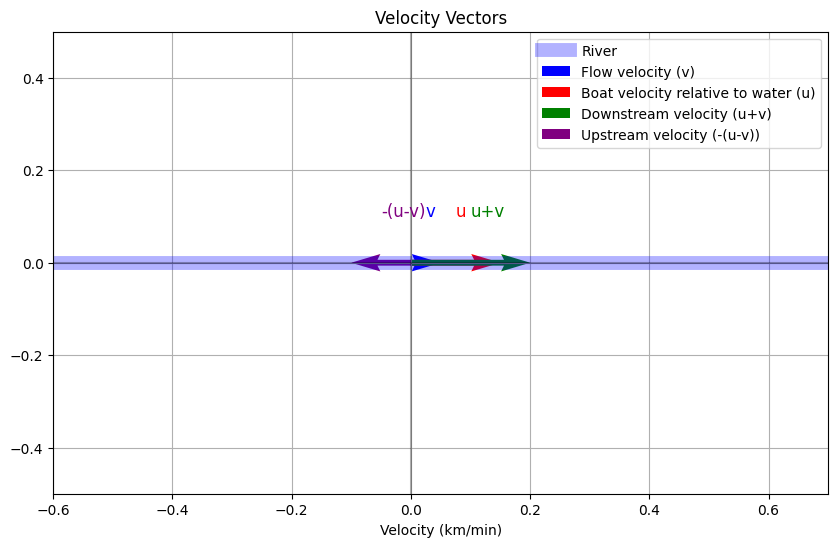

In [14]:
# Now let's create a vector diagram to show the velocities

plt.figure(figsize=(10, 6))

# Draw the river
plt.axhline(y=0, color='blue', linestyle='-', alpha=0.3, linewidth=10, label='River')

# Origin point
origin = [0, 0]

# Draw vectors
plt.quiver(*origin, v, 0, color='blue', angles='xy', scale_units='xy', scale=1, label='Flow velocity (v)')
plt.quiver(*origin, u, 0, color='red', angles='xy', scale_units='xy', scale=1, label='Boat velocity relative to water (u)')
plt.quiver(*origin, v1, 0, color='green', angles='xy', scale_units='xy', scale=1, label='Downstream velocity (u+v)')
plt.quiver(*origin, -v2, 0, color='purple', angles='xy', scale_units='xy', scale=1, label='Upstream velocity (-(u-v))')

# Add text labels
plt.text(v/2, 0.1, 'v', color='blue', fontsize=12)
plt.text(u/2, 0.1, 'u', color='red', fontsize=12)
plt.text(v1/2, 0.1, 'u+v', color='green', fontsize=12)
plt.text(-v2/2, 0.1, '-(u-v)', color='purple', fontsize=12)

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-v2-0.5, v1+0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('Velocity (km/min)')
plt.title('Velocity Vectors')
plt.legend()
plt.show()

In [15]:
# Print the calculated flow velocity
print(f"The flow velocity is {v:.4f} km/min = {v*1000/60:.2f} m/s")

The flow velocity is 0.0500 km/min = 0.83 m/s


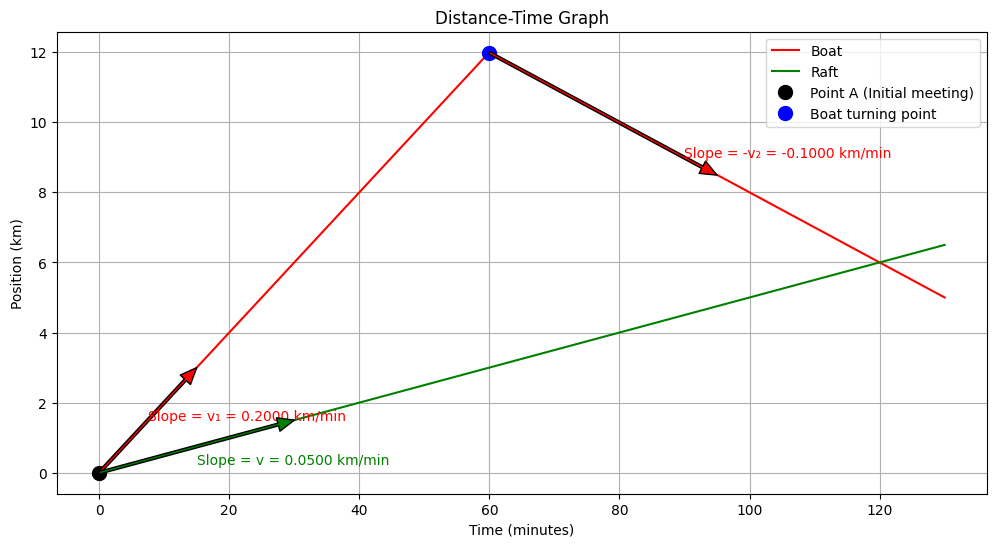

In [16]:
# Additional visualization: Distance-time graph with slopes representing velocities

plt.figure(figsize=(12, 6))

# Time points
t_plot = np.linspace(0, total_time, 500)

# Calculate positions
boat_pos_plot = boat_position(t_plot)
raft_pos_plot = raft_position(t_plot)

# Plot distance vs time
plt.plot(t_plot, boat_pos_plot, 'r-', label='Boat')
plt.plot(t_plot, raft_pos_plot, 'g-', label='Raft')

# Find the index closest to tau
tau_idx_plot = np.abs(t_plot - tau).argmin()

# Add slope indicators
# Downstream
plt.annotate('', xy=(tau/4, v1*tau/4), xytext=(0,0), 
             arrowprops=dict(facecolor='red', width=2, headwidth=10))
plt.text(tau/8, v1*tau/8, f'Slope = v₁ = {v1:.4f} km/min', color='red', fontsize=10)

# Upstream
mid_t = (tau + t_plot[-1])/2
mid_idx = np.abs(t_plot - mid_t).argmin()
mid_pos_boat = boat_pos_plot[mid_idx]
plt.annotate('', xy=(mid_t, mid_pos_boat), xytext=(tau, boat_pos_plot[tau_idx_plot]), 
             arrowprops=dict(facecolor='red', width=2, headwidth=10))
plt.text(mid_t-5, mid_pos_boat+0.5, f'Slope = -v₂ = {-v2:.4f} km/min', color='red', fontsize=10)

# Raft
plt.annotate('', xy=(tau/2, v*tau/2), xytext=(0,0), 
             arrowprops=dict(facecolor='green', width=2, headwidth=10))
plt.text(tau/4, v*tau/4-0.5, f'Slope = v = {v:.4f} km/min', color='green', fontsize=10)

# Mark important points
plt.plot(0, 0, 'ko', markersize=10, label='Point A (Initial meeting)')
plt.plot(tau, boat_pos_plot[tau_idx_plot], 'bo', markersize=10, label='Boat turning point')

# Find where boat and raft meet after turning
meeting_indices = np.where(np.abs(boat_pos_plot - raft_pos_plot) < 0.01)[0]
meeting_idx = None
for idx in meeting_indices:
    if t_plot[idx] > tau:  # After turning
        meeting_idx = idx
        break

if meeting_idx is not None:
    meeting_time = t_plot[meeting_idx]
    plt.plot(meeting_time, raft_pos_plot[meeting_idx], 'mo', markersize=10, label='Second meeting')
    plt.axhline(y=raft_pos_plot[meeting_idx], color='purple', linestyle='--')
    plt.text(meeting_time+5, raft_pos_plot[meeting_idx]+0.2, f'l = {l} km')

plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Position (km)')
plt.title('Distance-Time Graph')
plt.legend()
plt.show()